# Project: Soil fertility prediction using machine learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')
data.head()

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
0,7.74,0.40,0.01,0.01,75,20.0,279,0.48,6.4,0.21,4.7,84.3,6.8,8.9,6.72,7.81,Fertile
1,9.02,0.31,0.02,0.03,85,15.7,247,0.27,6.4,0.16,5.6,90.4,3.9,5.7,4.61,7.19,Fertile
2,7.80,0.17,0.02,0.03,77,35.6,265,0.46,6.2,0.51,6.1,84.5,6.9,8.6,1.53,12.32,Fertile
3,8.36,0.02,0.03,0.05,106,6.4,127,0.50,3.1,0.28,2.3,93.9,1.7,4.4,0.00,1.60,Non Fertile
4,8.36,1.08,0.03,0.05,96,10.5,96,0.31,3.2,0.23,4.1,91.5,4.1,4.4,9.08,7.21,Non Fertile


In [3]:
test_data1 = pd.read_csv('testdata1fls.csv')
test_data2 = pd.read_csv('testdata2wls.csv')
test_data1

,Ph,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC
0,7.34,0.18,0.26,0.45,172,13,90,0.28,2.6,2.10,0.80,80.99,4.69,14.32,1.90,2.69
1,7.86,0.72,0.74,1.27,212,6,148,0.55,6.2,0.18,4.70,85.91,1.58,12.51,4.30,4.01
2,9.00,2.36,0.77,1.33,380,58,404,3.93,4.8,3.20,2.90,83.49,5.92,10.59,2.67,3.79
3,7.52,0.63,0.30,0.51,183,36,265,2.65,3.9,0.82,8.03,78.56,8.80,12.64,6.41,4.64
4,8.71,1.87,0.58,1.00,290,19,584,4.00,3.5,0.09,0.70,82.21,7.74,10.05,3.54,6.22


In [4]:
test_data2

,Ph,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC
0,6.63,0.14,0.08,0.13,74,10.50,326,0.38,3.47,0.03,6.11,90.08,7.29,2.63,1.02,3.06
1,7.92,0.41,0.27,0.46,180,4.53,148,0.51,2.42,0.15,0.52,95.25,1.51,3.24,2.50,4.11
2,6.34,2.72,0.14,0.24,154,18.97,176,0.76,4.19,0.67,0.80,97.82,1.00,1.18,3.34,2.27
3,8.35,0.56,0.29,0.50,248,33.00,134,0.27,6.48,0.08,0.27,96.01,2.88,1.11,1.88,3.82
4,8.78,0.33,0.11,0.19,227,12.70,103,0.18,2.73,0.11,0.40,92.66,1.67,5.67,3.03,2.73


In [5]:
data.shape

(100, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pH      100 non-null    float64
 1   EC      100 non-null    float64
 2   OC      100 non-null    float64
 3   OM      100 non-null    float64
 4   N       100 non-null    int64  
 5   P       100 non-null    float64
 6   K       100 non-null    int64  
 7   Zn      100 non-null    float64
 8   Fe      100 non-null    float64
 9   Cu      100 non-null    float64
 10  Mn      100 non-null    float64
 11  Sand    100 non-null    float64
 12  Silt    100 non-null    float64
 13  Clay    100 non-null    float64
 14  CaCO3   100 non-null    float64
 15  CEC     100 non-null    float64
 16  Output  100 non-null    object 
dtypes: float64(14), int64(2), object(1)
memory usage: 13.4+ KB


In [7]:
data.nunique()

pH        71
EC        48
OC        40
OM        40
N         76
P         80
K         84
Zn        61
Fe        46
Cu        50
Mn        53
Sand      71
Silt      63
Clay      59
CaCO3     72
CEC       95
Output     2
dtype: int64

In [8]:
data.isnull().sum()

pH        0
EC        0
OC        0
OM        0
N         0
P         0
K         0
Zn        0
Fe        0
Cu        0
Mn        0
Sand      0
Silt      0
Clay      0
CaCO3     0
CEC       0
Output    0
dtype: int64

In [9]:
x = data.drop('Output',axis='columns')
x.head()

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC
0,7.74,0.40,0.01,0.01,75,20.0,279,0.48,6.4,0.21,4.7,84.3,6.8,8.9,6.72,7.81
1,9.02,0.31,0.02,0.03,85,15.7,247,0.27,6.4,0.16,5.6,90.4,3.9,5.7,4.61,7.19
2,7.80,0.17,0.02,0.03,77,35.6,265,0.46,6.2,0.51,6.1,84.5,6.9,8.6,1.53,12.32
3,8.36,0.02,0.03,0.05,106,6.4,127,0.50,3.1,0.28,2.3,93.9,1.7,4.4,0.00,1.60
4,8.36,1.08,0.03,0.05,96,10.5,96,0.31,3.2,0.23,4.1,91.5,4.1,4.4,9.08,7.21


In [10]:
# create the coreleation matrix
x.corr()

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC
pH,1.000000,-0.039785,0.054628,0.054636,0.215123,-0.104457,0.008033,-0.125287,0.000248,0.111895,-0.065682,-0.102130,0.139819,0.018530,0.069781,-0.127546
EC,-0.039785,1.000000,-0.064467,-0.065148,-0.131516,0.034344,0.174792,0.022255,0.177803,0.031690,0.170074,-0.264067,0.148132,0.310270,0.244580,0.151634
OC,0.054628,-0.064467,1.000000,0.999953,0.874600,-0.063918,0.117024,0.052893,0.268363,0.048208,-0.049230,-0.226911,0.200327,0.177017,-0.064737,0.242274
OM,0.054636,-0.065148,0.999953,1.000000,0.874989,-0.065122,0.117469,0.052041,0.267066,0.047907,-0.049630,-0.225636,0.199655,0.175467,-0.064763,0.241222
N,0.215123,-0.131516,0.874600,0.874989,1.000000,-0.174320,0.080173,0.074115,0.184906,0.079142,-0.107176,-0.161278,0.216251,0.035362,-0.030218,0.146390
P,-0.104457,0.034344,-0.063918,-0.065122,-0.174320,1.000000,0.040908,0.088894,0.155752,0.179923,0.253839,-0.405029,0.200875,0.508103,0.223148,0.440307
K,0.008033,0.174792,0.117024,0.117469,0.080173,0.040908,1.000000,0.029318,0.105048,-0.035262,0.127351,-0.336955,0.360472,0.185336,-0.037375,0.220634
Zn,-0.125287,0.022255,0.052893,0.052041,0.074115,0.088894,0.029318,1.000000,-0.015407,0.117413,0.038849,0.033104,-0.057720,0.009284,0.053424,0.114444
Fe,0.000248,0.177803,0.268363,0.267066,0.184906,0.155752,0.105048,-0.015407,1.000000,0.330394,0.239800,-0.364939,0.281886,0.334471,0.029093,0.209504
Cu,0.111895,0.031690,0.048208,0.047907,0.079142,0.179923,-0.035262,0.117413,0.330394,1.000000,0.191066,-0.311347,0.269432,0.249503,0.076123,0.337317


<AxesSubplot:>

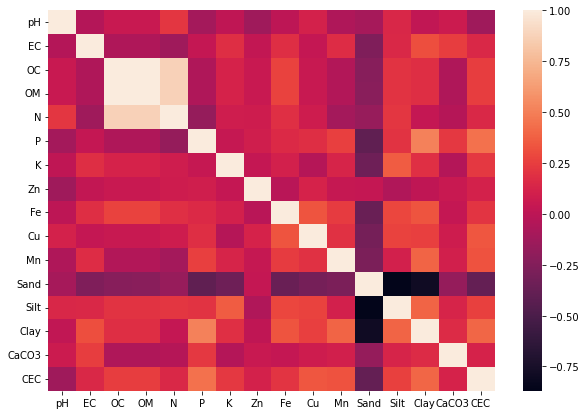

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(x.corr())  # annot=True)

In [12]:
#sns.pairplot(x)

In [13]:
# convert decision column as numerical value
from sklearn.preprocessing import LabelEncoder
s_output = LabelEncoder()
data['Output'] = s_output.fit_transform(data['Output'])
data.head()
# 0 - fertile
# 1 - nonfertile

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
0,7.74,0.40,0.01,0.01,75,20.0,279,0.48,6.4,0.21,4.7,84.3,6.8,8.9,6.72,7.81,0
1,9.02,0.31,0.02,0.03,85,15.7,247,0.27,6.4,0.16,5.6,90.4,3.9,5.7,4.61,7.19,0
2,7.80,0.17,0.02,0.03,77,35.6,265,0.46,6.2,0.51,6.1,84.5,6.9,8.6,1.53,12.32,0
3,8.36,0.02,0.03,0.05,106,6.4,127,0.50,3.1,0.28,2.3,93.9,1.7,4.4,0.00,1.60,1
4,8.36,1.08,0.03,0.05,96,10.5,96,0.31,3.2,0.23,4.1,91.5,4.1,4.4,9.08,7.21,1


In [14]:
y = data.Output
y.head()

0    0
1    0
2    0
3    1
4    1
Name: Output, dtype: int32

In [15]:
x.head()

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC
0,7.74,0.40,0.01,0.01,75,20.0,279,0.48,6.4,0.21,4.7,84.3,6.8,8.9,6.72,7.81
1,9.02,0.31,0.02,0.03,85,15.7,247,0.27,6.4,0.16,5.6,90.4,3.9,5.7,4.61,7.19
2,7.80,0.17,0.02,0.03,77,35.6,265,0.46,6.2,0.51,6.1,84.5,6.9,8.6,1.53,12.32
3,8.36,0.02,0.03,0.05,106,6.4,127,0.50,3.1,0.28,2.3,93.9,1.7,4.4,0.00,1.60
4,8.36,1.08,0.03,0.05,96,10.5,96,0.31,3.2,0.23,4.1,91.5,4.1,4.4,9.08,7.21


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [17]:
x_train.shape

(80, 16)

In [30]:
# prediction using Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [31]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [32]:
pred = rf.predict(x_test)

In [43]:
rf.score(x_test,pred)

1.0

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acrf = accuracy_score(y_test, pred)
cmrf = confusion_matrix(y_test, pred)
print('Accuracy for Naive Random Forest is: ',acrf)

Accuracy for Naive Random Forest is:  1.0


In [34]:
# prediction using Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [35]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [36]:
predgb = gb.predict(x_test)

In [37]:
gb.score(x_test,predgb)

1.0

In [38]:
# prediction using support vector machine
from sklearn.svm import SVC
sv = SVC()

In [39]:
sv.fit(x_train, y_train)

SVC()

In [40]:
predsv = sv.predict(x_test,)

In [41]:
sv.score(x_test,predsv)

1.0

In [44]:
# prediction using Naive Bayes 
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [45]:
nb.fit(x_train, y_train)

MultinomialNB()

In [46]:
prednb = nb.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acnb = accuracy_score(y_test, prednb)
cmnb = confusion_matrix(y_test, prednb)
print('Accuracy for Naive Byes is: ',acnb)

Accuracy for Naive Byes is:  0.75


In [60]:
# prediction using decision tree
from sklearn.tree import DecisionTreeClassifier
ddt = DecisionTreeClassifier()
ddt.fit(x_train, y_train)

DecisionTreeClassifier()

In [62]:
predddt = ddt.predict(x_test)

In [63]:
asddt = accuracy_score(y_test, predddt)
asddt

0.95

In [49]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [50]:
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

In [51]:
x_train.head()

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC
34,8.32,0.06,0.10,0.17,145,10.4,185,0.44,3.7,0.24,1.3,90.7,3.6,5.7,5.30,1.90
64,8.06,0.17,0.20,0.34,188,18.7,416,0.25,4.8,0.29,1.6,84.3,9.5,6.2,0.00,6.10
74,8.25,0.34,0.24,0.41,218,6.7,334,0.41,3.1,0.19,3.6,88.6,7.1,4.3,2.48,6.28
42,9.27,1.58,0.11,0.18,140,10.5,318,0.22,8.3,0.08,6.2,82.4,7.6,10.0,1.09,3.45
37,8.20,0.11,0.10,0.17,149,27.5,320,1.30,3.8,0.18,4.9,83.7,7.3,9.0,3.60,6.03


In [56]:
#y_train_std = y_train
#nb.fit(x_train_std, y_train_std)

In [57]:
# prediction using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
y_train_std = y_train
dt.fit(x_train_std, y_train_std)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [58]:
preddt = dt.predict(x_test_std)

In [59]:
asdt = accuracy_score(y_test, preddt)
asdt

0.9